In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

ModuleNotFoundError: No module named 'sklearn.Vsemble'

In [4]:
df_train = pd.read_csv('C:/Users/Vnoble IP 1043/Desktop/EIP-DATA/paper work/hho_diabetes_with_cat_boost/dataset/Training.csv')
df_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [5]:
df_train.drop(columns='Unnamed: 133', inplace=True)

In [7]:
df_train.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [8]:
df_train['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

c:\Users\Ennoble IP 1043\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


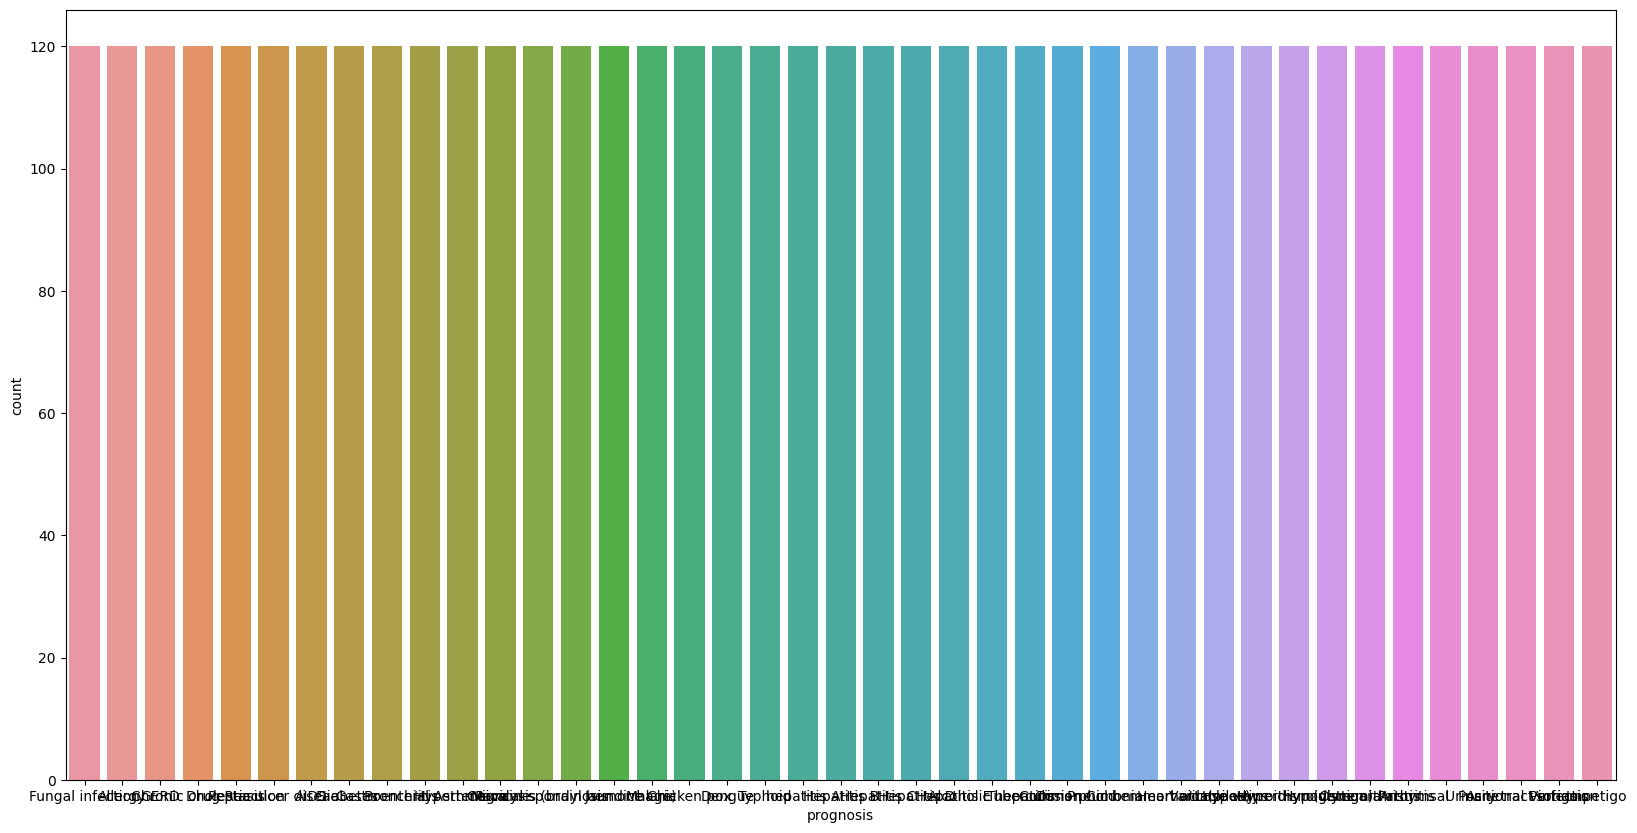

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(df_train['prognosis'])
plt.show()

In [10]:
le = preprocessing.LabelVcoder()
df_train['prognosis'] = le.fit_transform(df_train['prognosis'])

In [12]:
X = df_train.drop(columns=['prognosis'])
y = df_train['prognosis']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3936, 132)
(984, 132)
(3936,)
(984,)


In [15]:
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train, y_train)

print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))

LogisticRegressionModel Train Score is :  1.0
LogisticRegressionModel Test Score is :  1.0


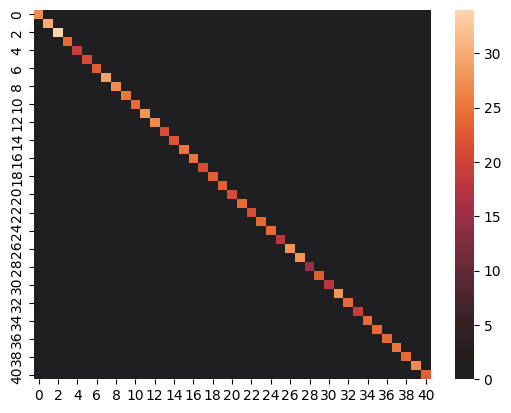

Confusion Matrix is
 [[27  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  0  0 ...  0  0 23]]


In [16]:
y_pred_LR = LogisticRegressionModel.predict(X_test)
CM_LR = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(CM_LR, cVter=True)
plt.show()
print('Confusion Matrix is\n', CM_LR)

In [20]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=50,
                          learning_rate=0.3,
                          depth=7)
model.fit(X_train, y_train)
print('Catboost Model Train Score is : ' , model.score(X_train, y_train))
print('catboost Model Test Score is : ' , model.score(X_test, y_test))

0:	learn: 10.1046134	total: 12.6ms	remaining: 616ms
1:	learn: 9.1327891	total: 17ms	remaining: 408ms
2:	learn: 7.9539020	total: 23.5ms	remaining: 368ms
3:	learn: 7.3111655	total: 26.7ms	remaining: 307ms
4:	learn: 6.5900141	total: 43.6ms	remaining: 392ms
5:	learn: 6.0090284	total: 55.8ms	remaining: 409ms
6:	learn: 5.5692200	total: 58.7ms	remaining: 361ms
7:	learn: 5.2482964	total: 61.2ms	remaining: 321ms
8:	learn: 4.7612073	total: 66.4ms	remaining: 302ms
9:	learn: 4.3869610	total: 69.9ms	remaining: 280ms
10:	learn: 4.1173908	total: 73.4ms	remaining: 260ms
11:	learn: 3.8666282	total: 76.3ms	remaining: 242ms
12:	learn: 3.6652885	total: 79.9ms	remaining: 227ms
13:	learn: 3.4814763	total: 83.5ms	remaining: 215ms
14:	learn: 3.1231346	total: 86.5ms	remaining: 202ms
15:	learn: 2.8163024	total: 98.9ms	remaining: 210ms
16:	learn: 2.6911708	total: 103ms	remaining: 200ms
17:	learn: 2.5862679	total: 106ms	remaining: 188ms
18:	learn: 2.4949412	total: 108ms	remaining: 177ms
19:	learn: 2.4260710	total

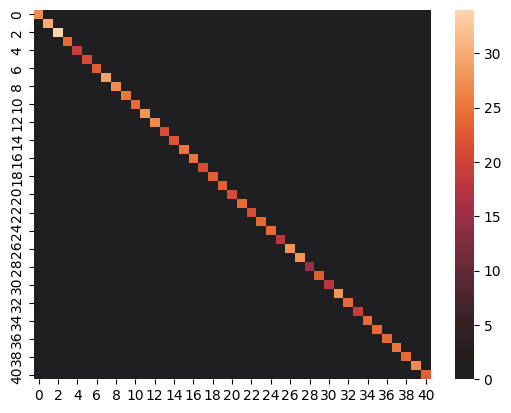

Confusion Matrix is
 [[27  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  0  0 ...  0  0 23]]


In [23]:
y_pred_CB = model.predict(X_test)
CM_CB = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(CM_CB ,cVter=True)
plt.show()
print('Confusion Matrix is\n', CM_CB)

In [24]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='Vtropy',max_depth=23,random_state=44)
DecisionTreeClassifierModel.fit(X_train, y_train)

print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))

DecisionTreeClassifierModel Train Score is :  1.0
DecisionTreeClassifierModel Test Score is :  1.0


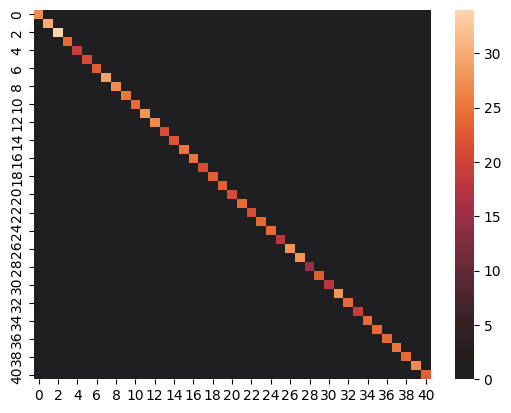

Confusion Matrix is
 [[27  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  0  0 ...  0  0 23]]


In [25]:
y_pred_DT = DecisionTreeClassifierModel.predict(X_test)
CM_DT = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(CM_DT, cVter=True)
plt.show()
print('Confusion Matrix is\n', CM_DT)

In [26]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'Vtropy', max_depth=12, n_estimators=100, random_state=44)
RandomForestClassifierModel.fit(X_train, y_train)

print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  1.0
RandomForestClassifierModel Test Score is :  1.0


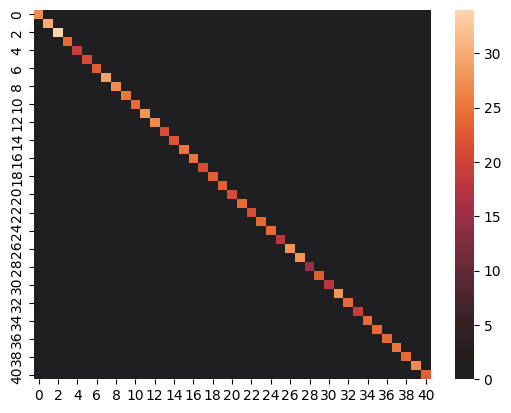

Confusion Matrix is
 [[27  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  0  0 ...  0  0 23]]


In [27]:
y_pred_RF = RandomForestClassifierModel.predict(X_test)
CM_RF = confusion_matrix(y_test, y_pred_RF)

sns.heatmap(CM_RF, cVter=True)
plt.show()

print('Confusion Matrix is\n', CM_RF)

In [28]:
GBCModel = GradiVtBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=44)
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  1.0
GBCModel Test Score is :  1.0


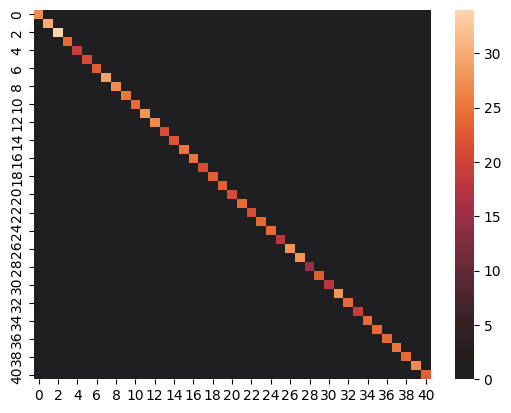

Confusion Matrix is
 [[27  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  0  0 ...  0  0 23]]


In [29]:
y_pred_GB = GBCModel.predict(X_test)
CM_GB = confusion_matrix(y_test, y_pred_GB)

sns.heatmap(CM_GB, cVter=True)
plt.show()

print('Confusion Matrix is\n', CM_GB)

In [35]:
VotingClassifierModel = VotingClassifier(estimators=[('LRModel',LogisticRegressionModel),
                                                     ('GBCModel',GBCModel),
                                                     ('RFCModel',RandomForestClassifierModel),
                                                     ('TDCModel',DecisionTreeClassifierModel)],
                                         voting='hard')
VotingClassifierModel.fit(X_train, y_train)
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))

VotingClassifierModel Train Score is :  1.0
VotingClassifierModel Test Score is :  1.0


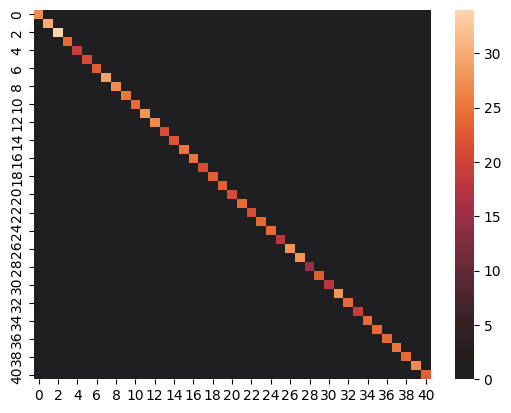

Confusion Matrix is
 [[27  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  0  0 ...  0  0 23]]


In [36]:
y_pred_V = VotingClassifierModel.predict(X_test)
CM_V = confusion_matrix(y_test, y_pred_V)
sns.heatmap(CM_V, cVter=True)
plt.show()
print('Confusion Matrix is\n', CM_V)